In [1681]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
%matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [1682]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [1683]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,13.19
1,12.20
2,12.29
3,12.42
4,14.54
...,...
3129,30.00
3130,29.35
3131,29.00
3132,22.93


<Axes: >

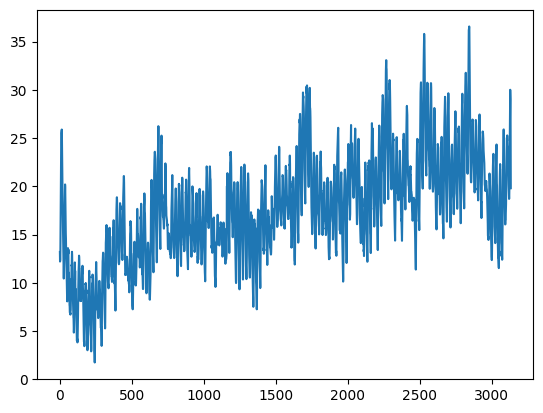

In [1684]:
data['temp'].plot()

In [1685]:
# convert string to datetime
date_time_str = '16/04/24 07:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2024, 4, 16, 7, 0)

In [1686]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 4, 16, 7, 0), datetime.datetime(2024, 8, 24, 21, 0))

In [1687]:
len(data)

3134

In [1688]:
date_time_str

'16/04/24 07:00:00'

In [1689]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))


In [1690]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19829.29166667, 19829.33333333, 19829.375     , ...,
       19959.75      , 19959.79166667, 19959.83333333])

In [1691]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [1692]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [1693]:
data[['dates','temp']]

,dates,temp
0,16/04/24 07:00:00,13.19
1,16/04/24 08:00:00,12.20
2,16/04/24 09:00:00,12.29
3,16/04/24 10:00:00,12.42
4,16/04/24 11:00:00,14.54
...,...,...
3129,24/08/24 16:00:00,30.00
3130,24/08/24 17:00:00,29.35
3131,24/08/24 18:00:00,29.00
3132,24/08/24 19:00:00,22.93


In [1694]:
import warnings
warnings.filterwarnings("ignore")


In [1695]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(       temp         hours              dates
 0     13.19  19829.291667  16/04/24 07:00:00
 1     12.20  19829.333333  16/04/24 08:00:00
 2     12.29  19829.375000  16/04/24 09:00:00
 3     12.42  19829.416667  16/04/24 10:00:00
 4     14.54  19829.458333  16/04/24 11:00:00
 ...     ...           ...                ...
 3129  30.00  19959.666667  24/08/24 16:00:00
 3130  29.35  19959.708333  24/08/24 17:00:00
 3131  29.00  19959.750000  24/08/24 18:00:00
 3132  22.93  19959.791667  24/08/24 19:00:00
 3133  19.80  19959.833333  24/08/24 20:00:00
 
 [3134 rows x 3 columns],
 3134)

In [1696]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [1697]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

19.400000000000016

In [1698]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

3110

In [1699]:
len(x)

3110

In [1700]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

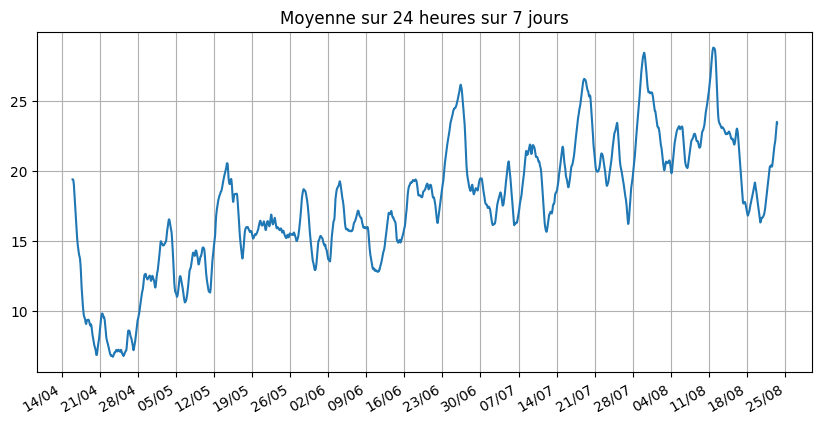

In [1701]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [1702]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=130, seconds=45023, microseconds=730014)

In [1703]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [1704]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 4, 16, 7, 0),
 datetime.datetime(2024, 8, 24, 19, 30, 23, 730014),
 130)

In [1705]:
moyenne = data['temp'].mean()
moyenne

17.59710593490749

17.59710593490749

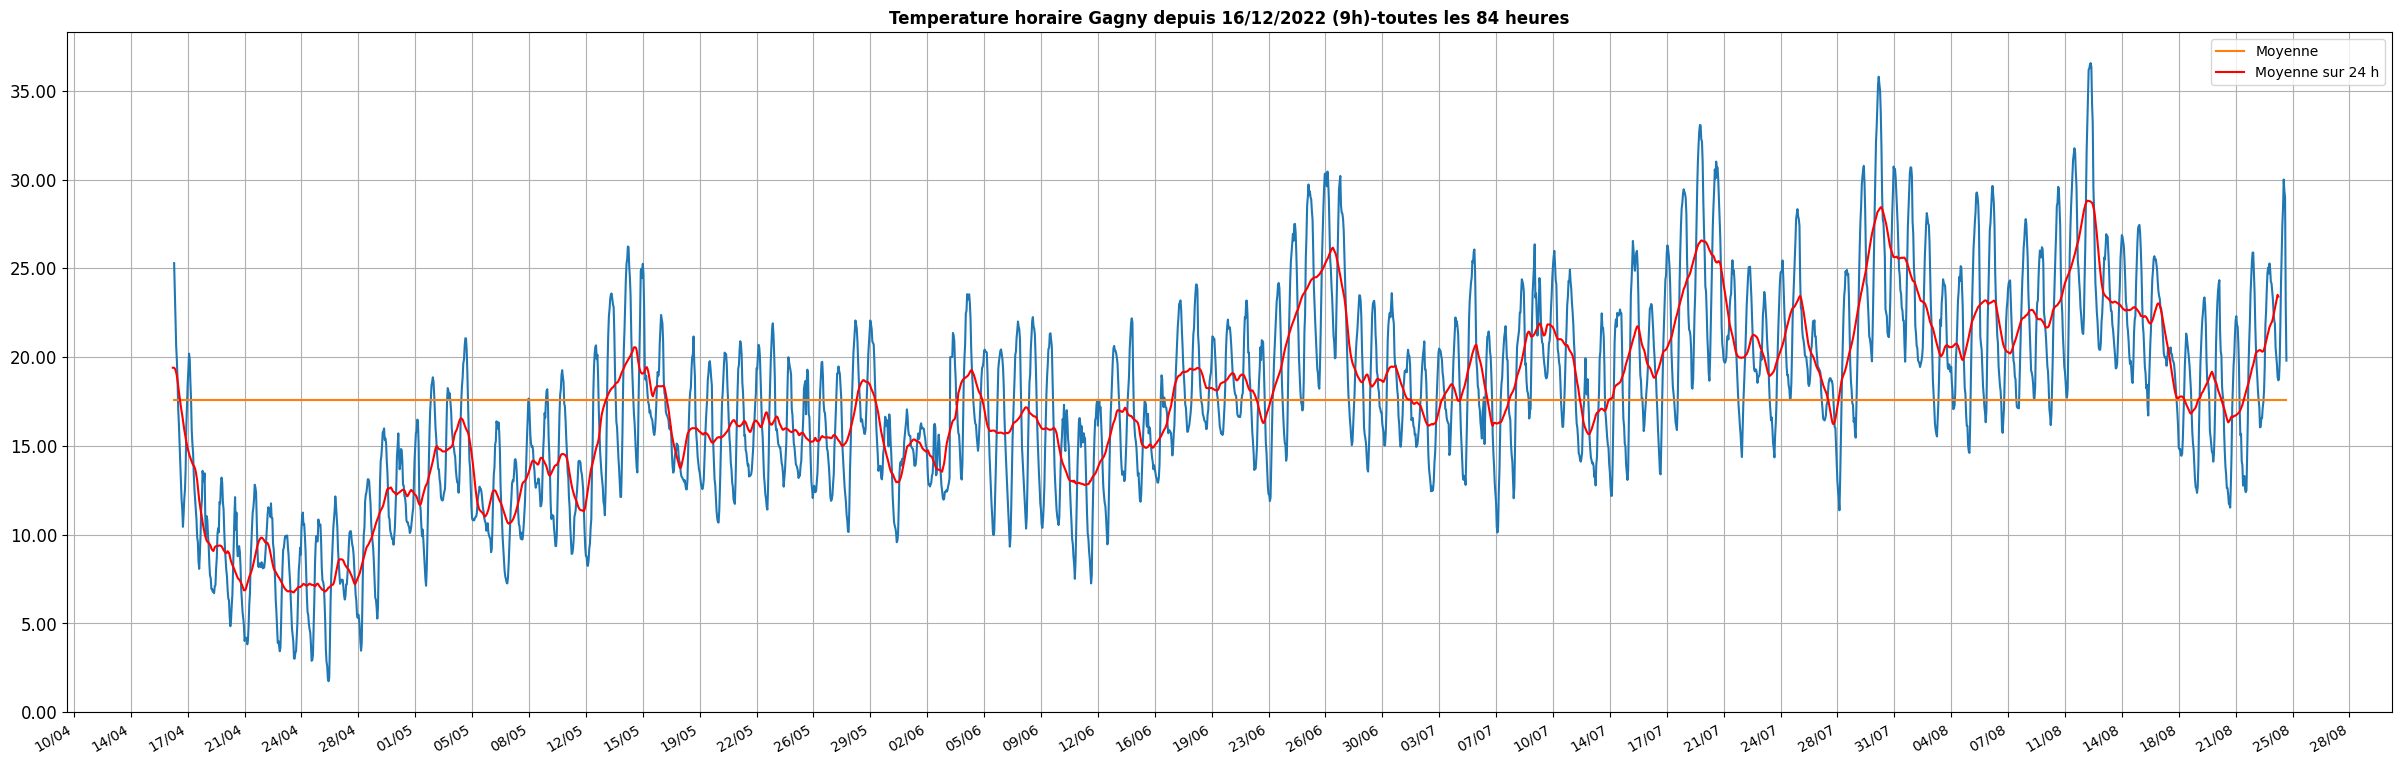

In [1706]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [1707]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
3129,30.00,19959.666667,24/08/24 16:00:00,1.61
3130,29.35,19959.708333,24/08/24 17:00:00,-0.65
3131,29.00,19959.750000,24/08/24 18:00:00,-0.35
3132,22.93,19959.791667,24/08/24 19:00:00,-6.07


<Axes: >

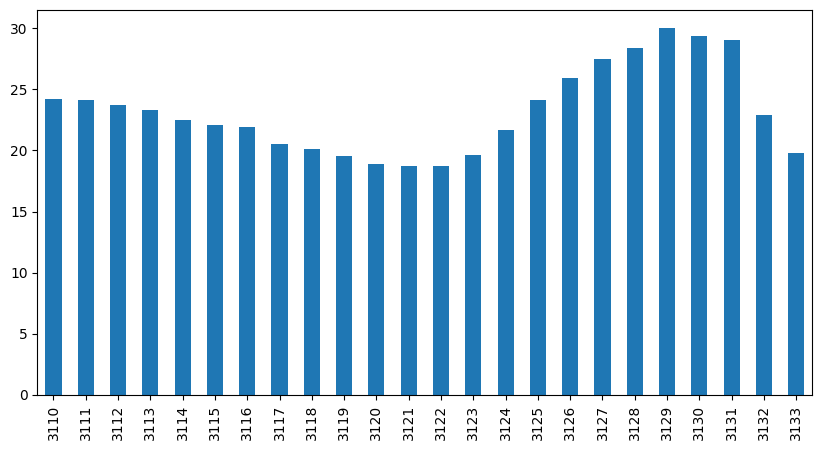

In [1708]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

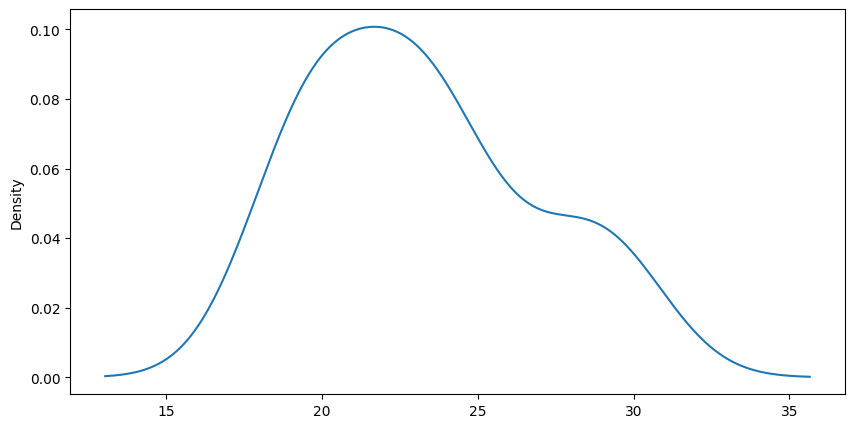

In [1709]:
try:
    data.tail(24)['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

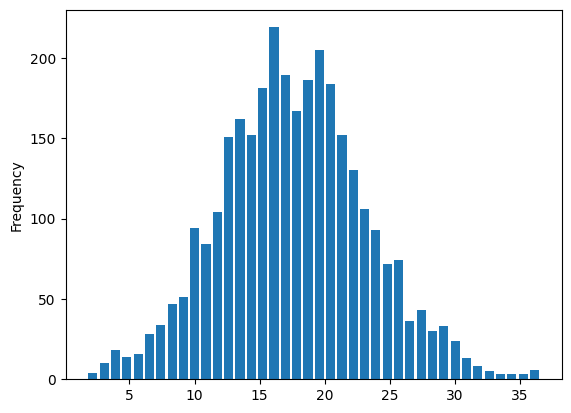

In [1710]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

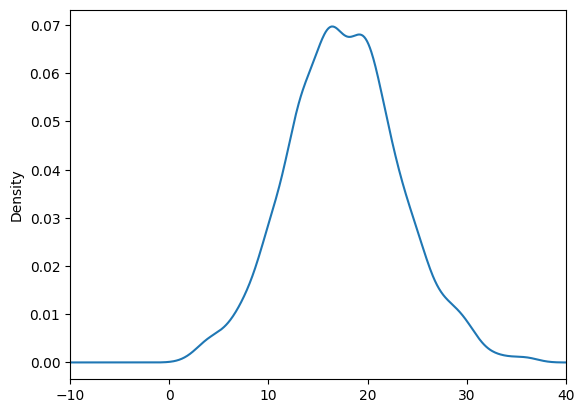

In [1711]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

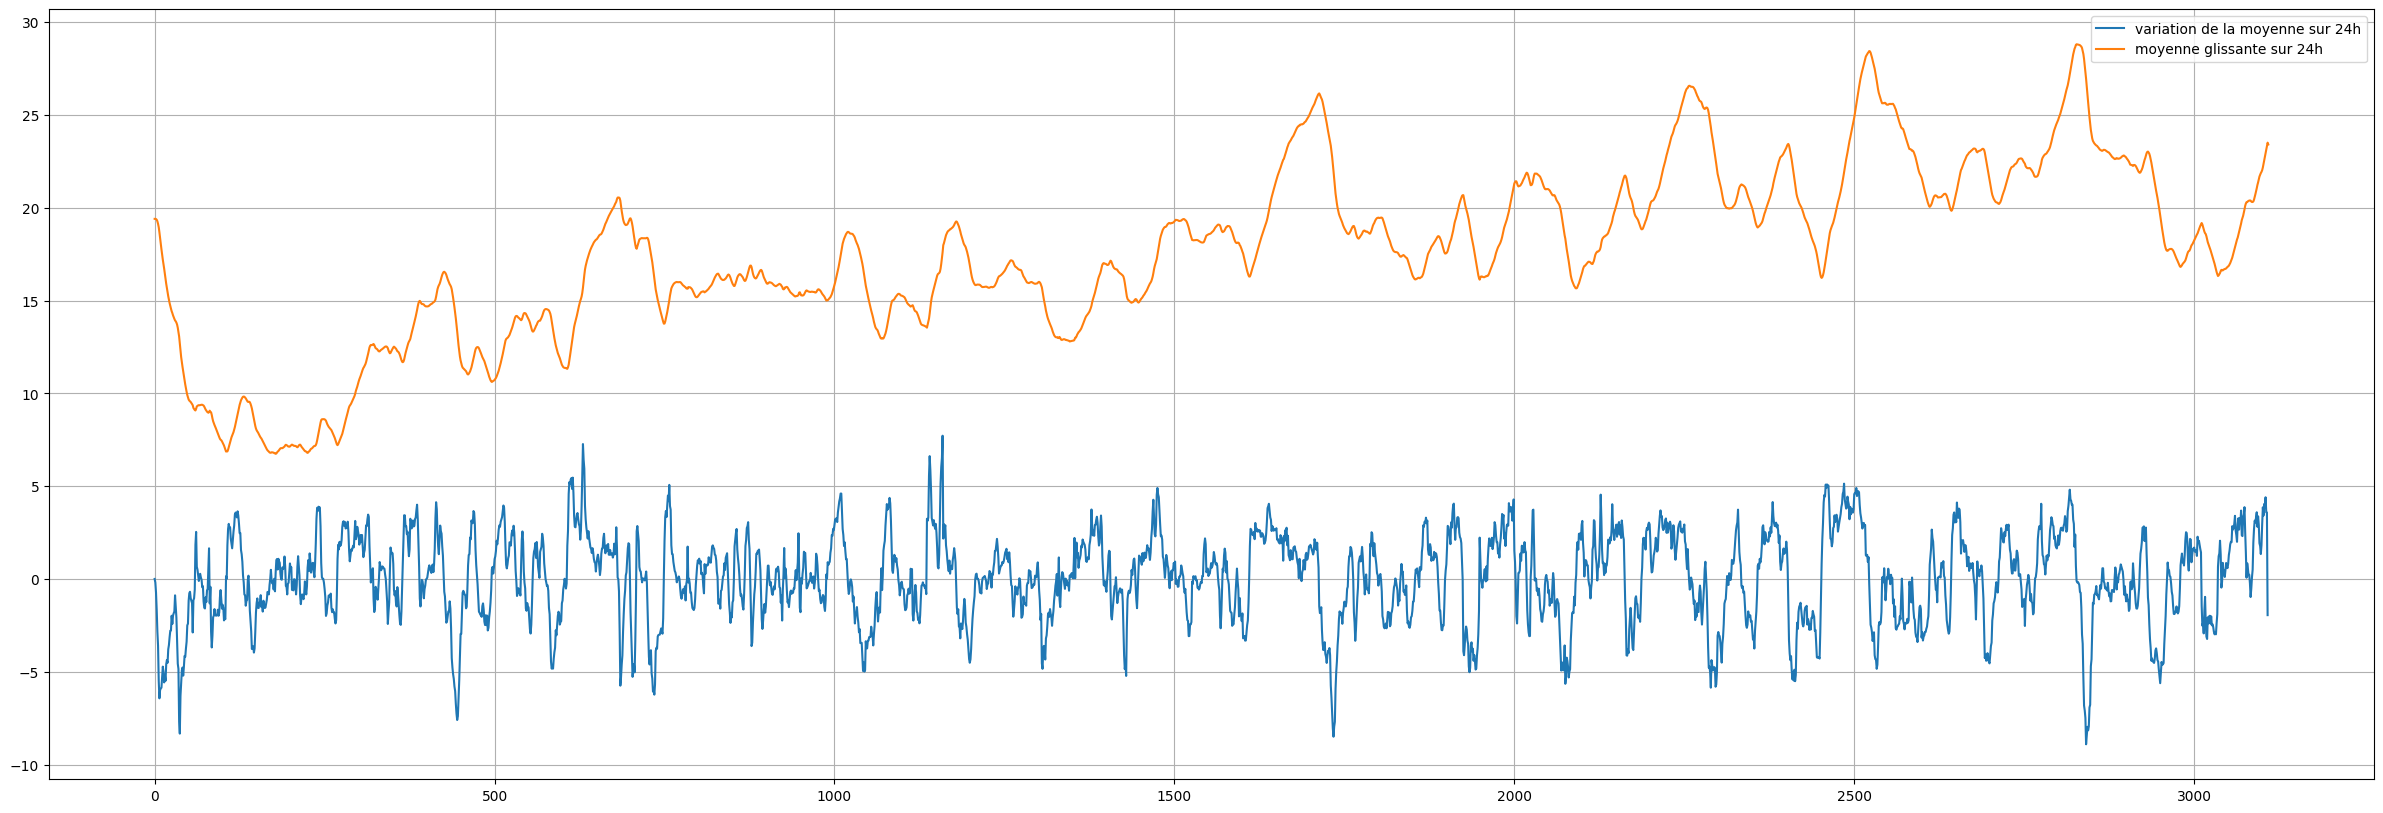

In [1712]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [1713]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [1714]:
window, days, interval

(24, 15, 12)

In [1715]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [1716]:
h

2774    19944.875000
2775    19944.916667
2776    19944.958333
2777    19945.000000
2778    19945.041667
            ...     
3129    19959.666667
3130    19959.708333
3131    19959.750000
3132    19959.791667
3133    19959.833333
Name: hours, Length: 360, dtype: float64

In [1717]:
 datetime.now()

datetime.datetime(2024, 8, 24, 19, 30, 29, 506462)

In [1718]:
window_start

'09/08/2024, 19:30:29'

In [1719]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

21.426500000000022

In [1720]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, 21.426500000000022)

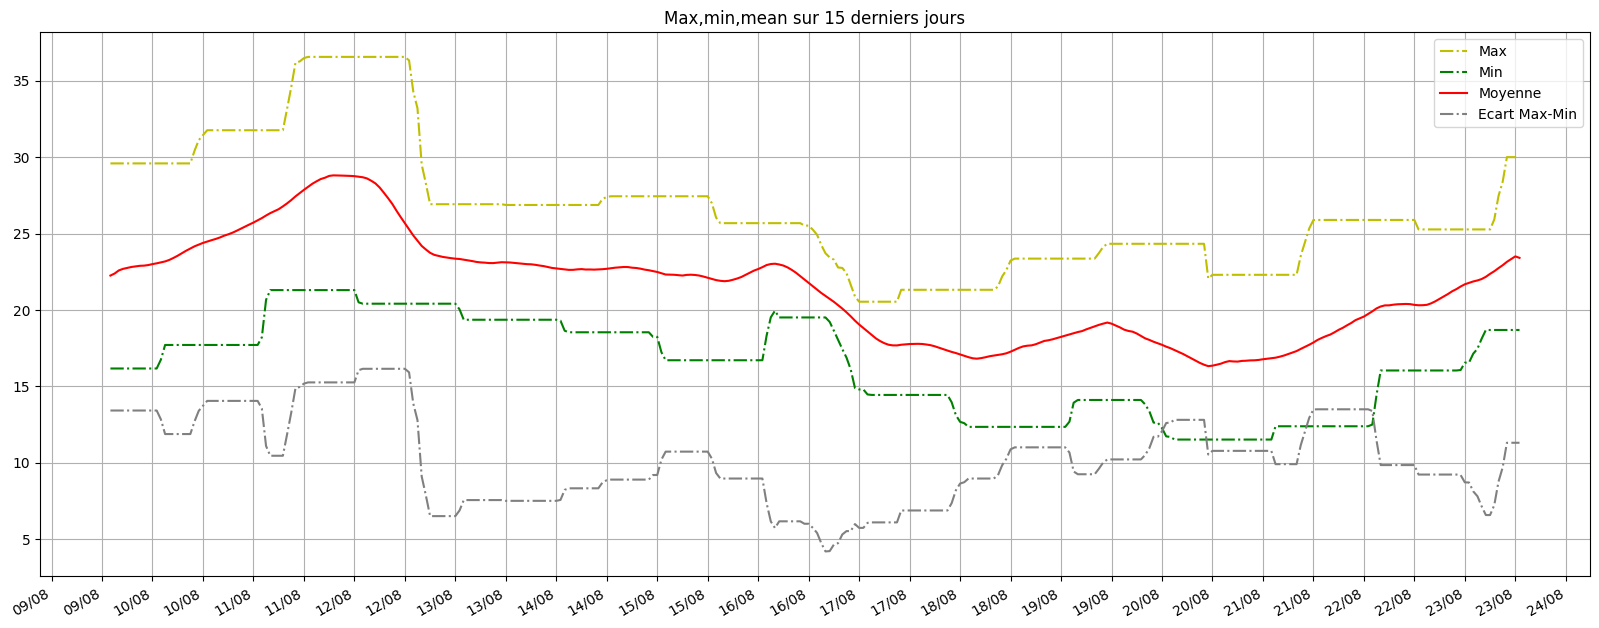

In [1721]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [1722]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

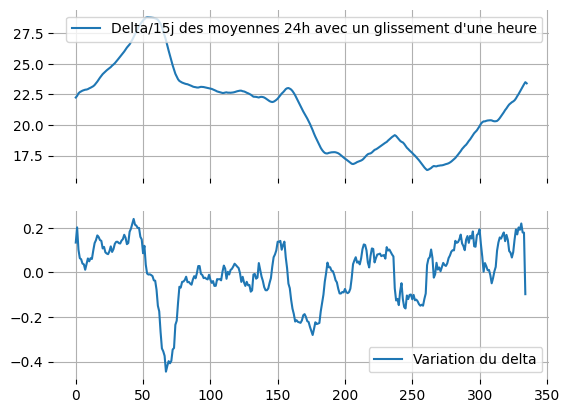

In [1723]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [1724]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [1725]:
# graphical output...
from pylab import sign, diff


In [1726]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


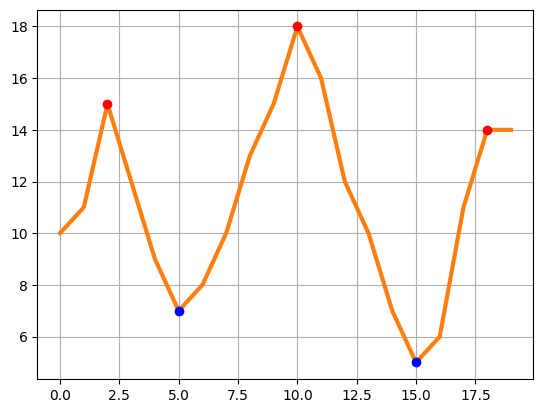

In [1727]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [1728]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
2966,17/08/24,21,19.75,-0.07
2967,17/08/24,22,19.63,-0.12
2968,17/08/24,23,19.22,-0.41
2969,18/08/24,00,18.64,-0.58
2970,18/08/24,01,18.04,-0.60
...,...,...,...,...
3129,24/08/24,16,30.00,1.61
3130,24/08/24,17,29.35,-0.65
3131,24/08/24,18,29.00,-0.35
3132,24/08/24,19,22.93,-6.07


In [1729]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [1730]:
_max - _min

18.48

## Main graph

(21.426500000000022, 15)

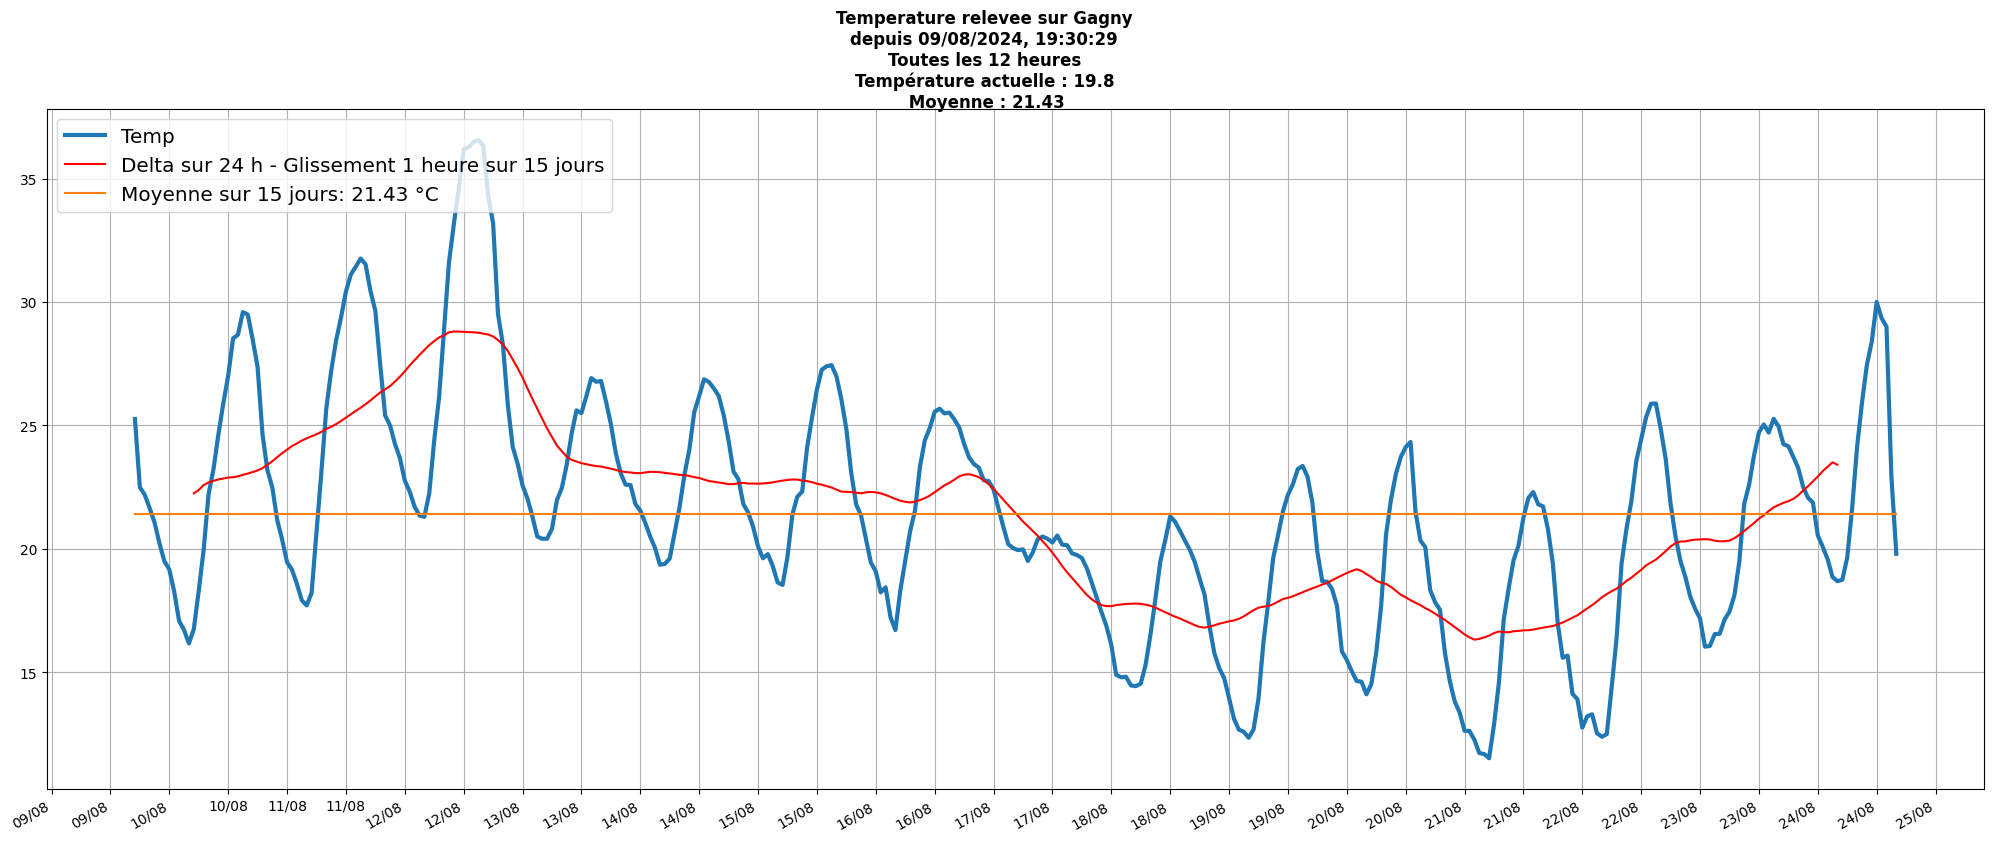

In [1731]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [1732]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
3129,16,30.00,1.61
3130,17,29.35,-0.65
3131,18,29.00,-0.35
3132,19,22.93,-6.07
3133,20,19.80,-3.13


In [1733]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

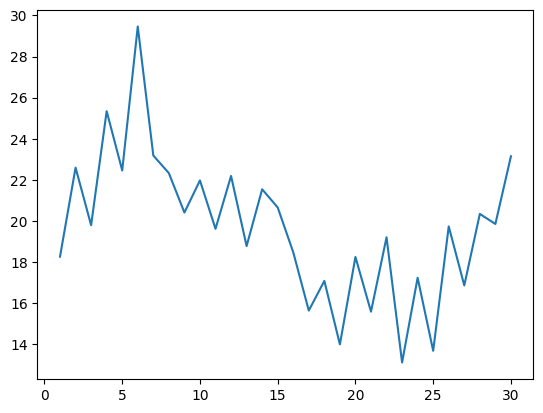

In [1734]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

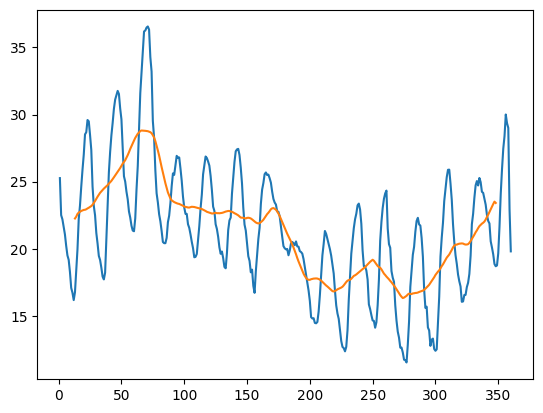

In [1735]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x1f541533a40>])

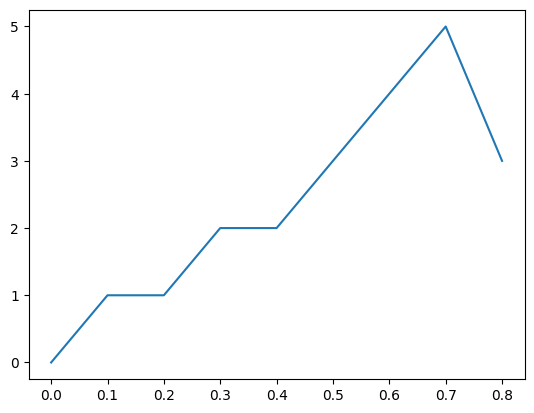

In [1736]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x1f5459e2d20>])

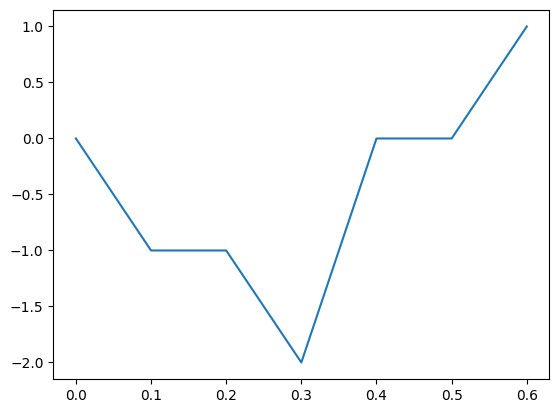

In [1737]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

In [1738]:
n = data.tail(1)['dates'].values[0]
n

'24/08/24 20:00:00'

# Température depuis 7 jours par heure

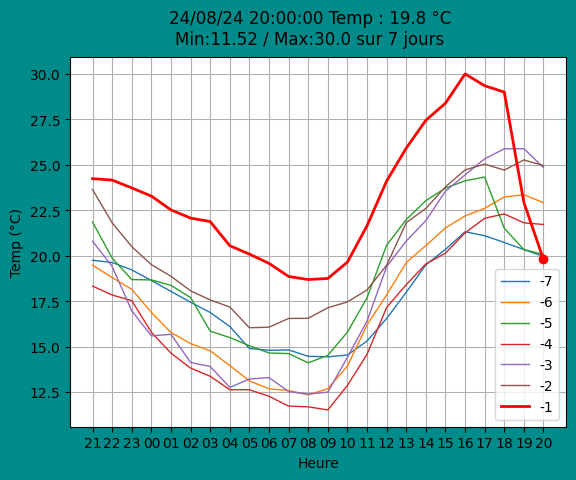

In [1739]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"{n} Temp : {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel(f"Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()

In [1740]:
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))

In [1741]:
max_,min_

(30.0, 18.69)

In [1742]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       3134 non-null   float64
 1   hours      3134 non-null   float64
 2   dates      3134 non-null   object 
 3   variation  3133 non-null   float64
 4   heures     3134 non-null   object 
 5   jours      3134 non-null   object 
dtypes: float64(3), object(3)
memory usage: 147.0+ KB


In [1743]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19829.291667,16/04/24 07:00:00,NaN,07,16/04/24
1,12.20,19829.333333,16/04/24 08:00:00,-0.99,08,16/04/24
2,12.29,19829.375000,16/04/24 09:00:00,0.09,09,16/04/24
3,12.42,19829.416667,16/04/24 10:00:00,0.13,10,16/04/24
4,14.54,19829.458333,16/04/24 11:00:00,2.12,11,16/04/24
...,...,...,...,...,...,...
3129,30.00,19959.666667,24/08/24 16:00:00,1.61,16,24/08/24
3130,29.35,19959.708333,24/08/24 17:00:00,-0.65,17,24/08/24
3131,29.00,19959.750000,24/08/24 18:00:00,-0.35,18,24/08/24
3132,22.93,19959.791667,24/08/24 19:00:00,-6.07,19,24/08/24


In [1744]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


In [1745]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [1746]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

# how to label on top of a bar plot

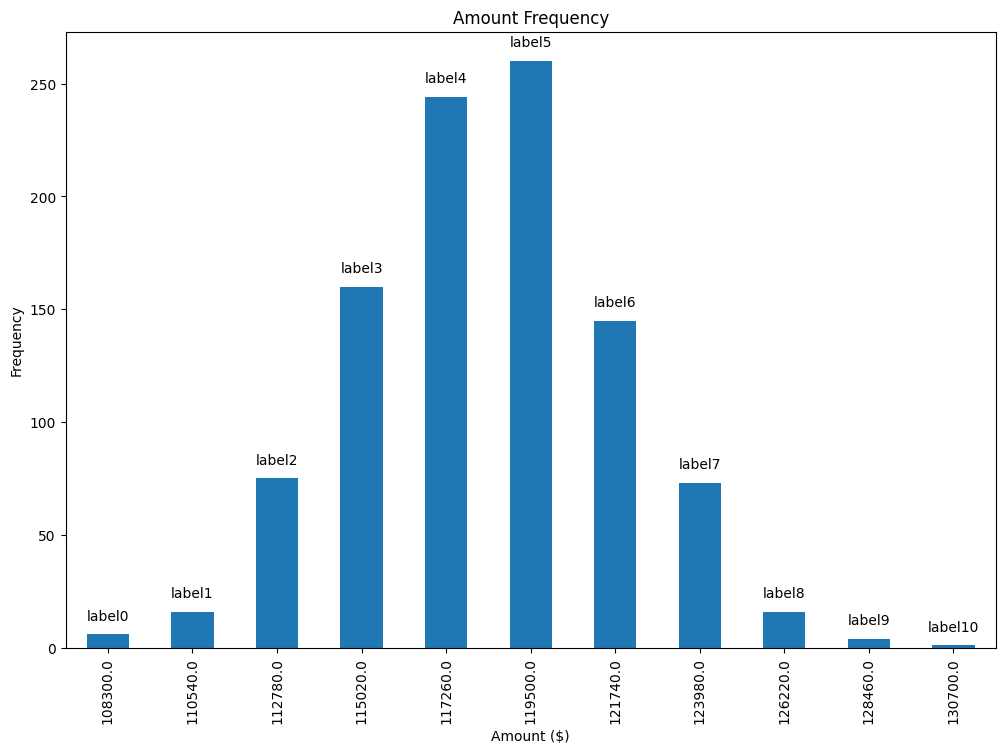

In [1747]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [1748]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25, [17.87, 17.62, 19.02, 16.63, 18.31, 20.49, 23.26])

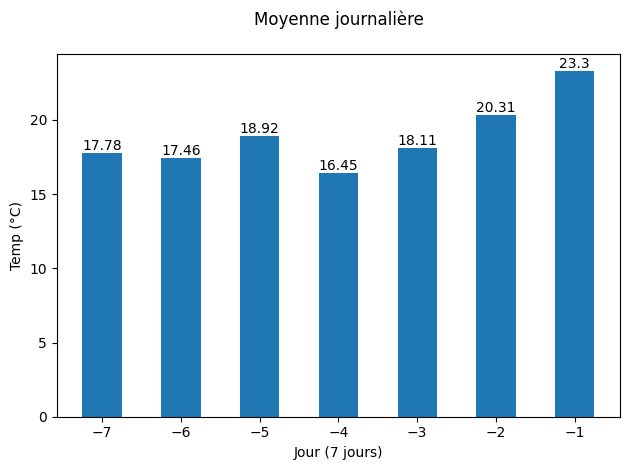

In [1749]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )



In [1750]:
labels

[17.78, 17.46, 18.92, 16.45, 18.11, 20.31, 23.3]

In [1751]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([24.24000000000001,
  24.160000000000025,
  23.73000000000001,
  23.28000000000003,
  22.52000000000004,
  22.07000000000005,
  21.879999999999995,
  20.55000000000001,
  20.090000000000032,
  19.58000000000004,
  18.860000000000014,
  18.69,
  18.75,
  19.65000000000004,
  21.65000000000004,
  24.110000000000014,
  25.920000000000016,
  27.450000000000045,
  28.390000000000043,
  30.0,
  29.350000000000023,
  29.0,
  22.930000000000007,
  19.80000000000001],
 534.6300000000006)

In [1752]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

534.6300000000005

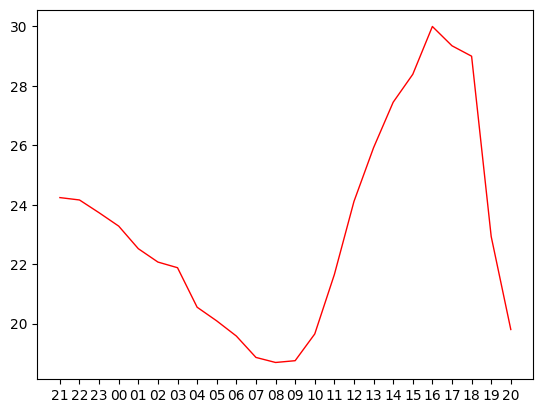

In [1753]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [1754]:
data.tail()


,temp,hours,dates,variation,heures,jours
3129,30.00,19959.666667,24/08/24 16:00:00,1.61,16,24/08/24
3130,29.35,19959.708333,24/08/24 17:00:00,-0.65,17,24/08/24
3131,29.00,19959.750000,24/08/24 18:00:00,-0.35,18,24/08/24
3132,22.93,19959.791667,24/08/24 19:00:00,-6.07,19,24/08/24
3133,19.80,19959.833333,24/08/24 20:00:00,-3.13,20,24/08/24


In [1755]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([24.24000000000001, 30.0], [18.69], 2, 1)

In [1756]:
_diff=[M-m for M,m in zip(_max, _min)]

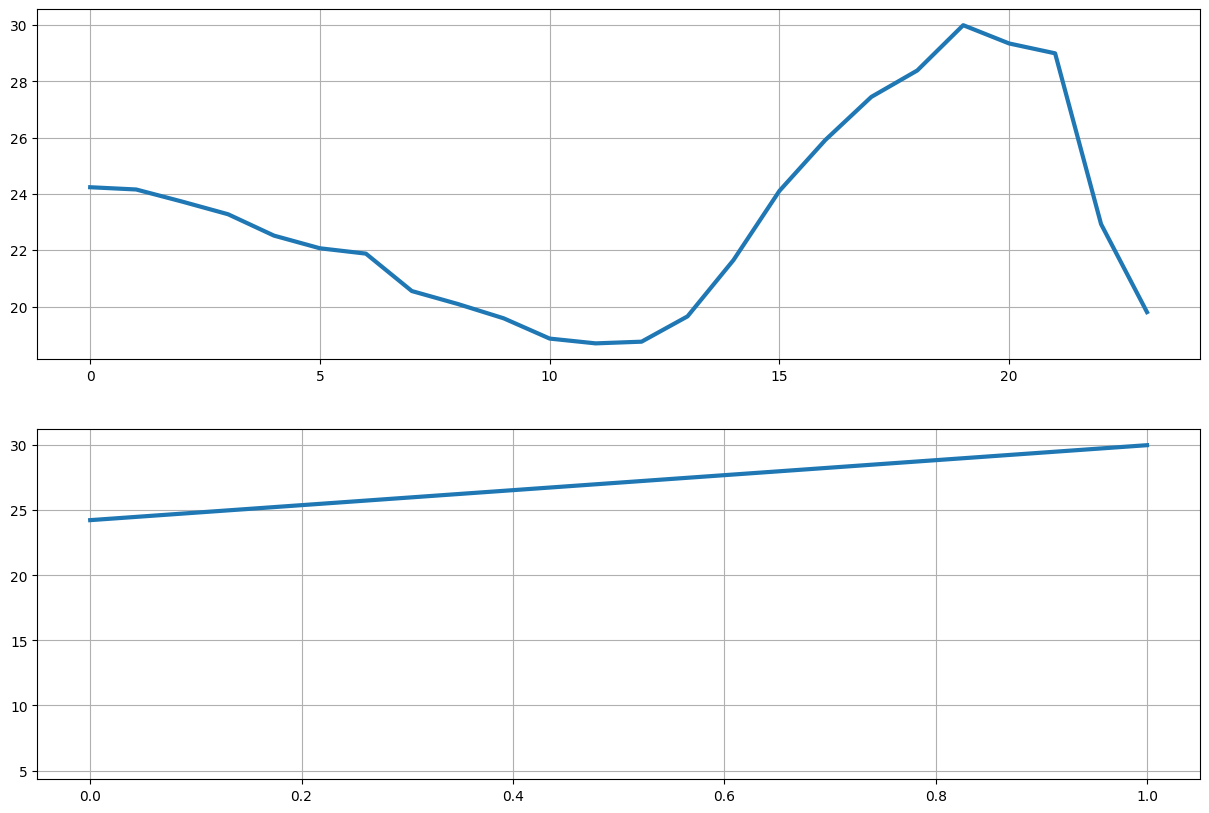

In [1757]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[] 0 [] 0
[] 0 [] 0


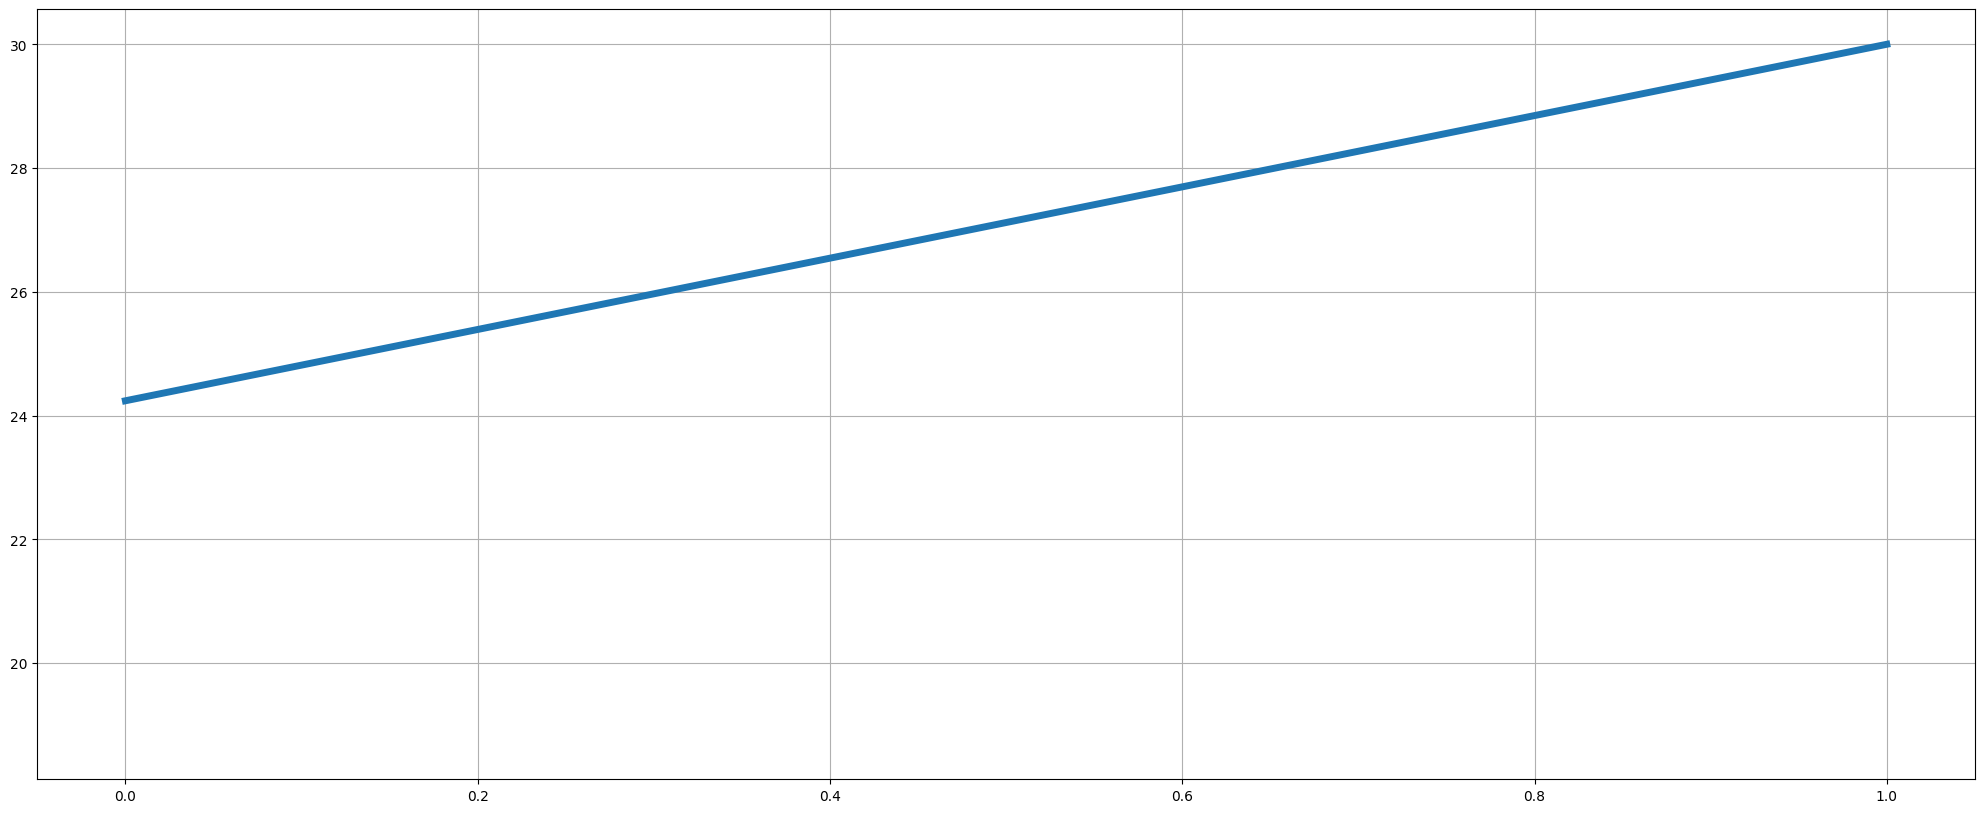

In [1758]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [1759]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [1760]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [1761]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [1762]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [1763]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17], dtype=int64),)

[ 5 15] 2 [ 2 10 18] 3


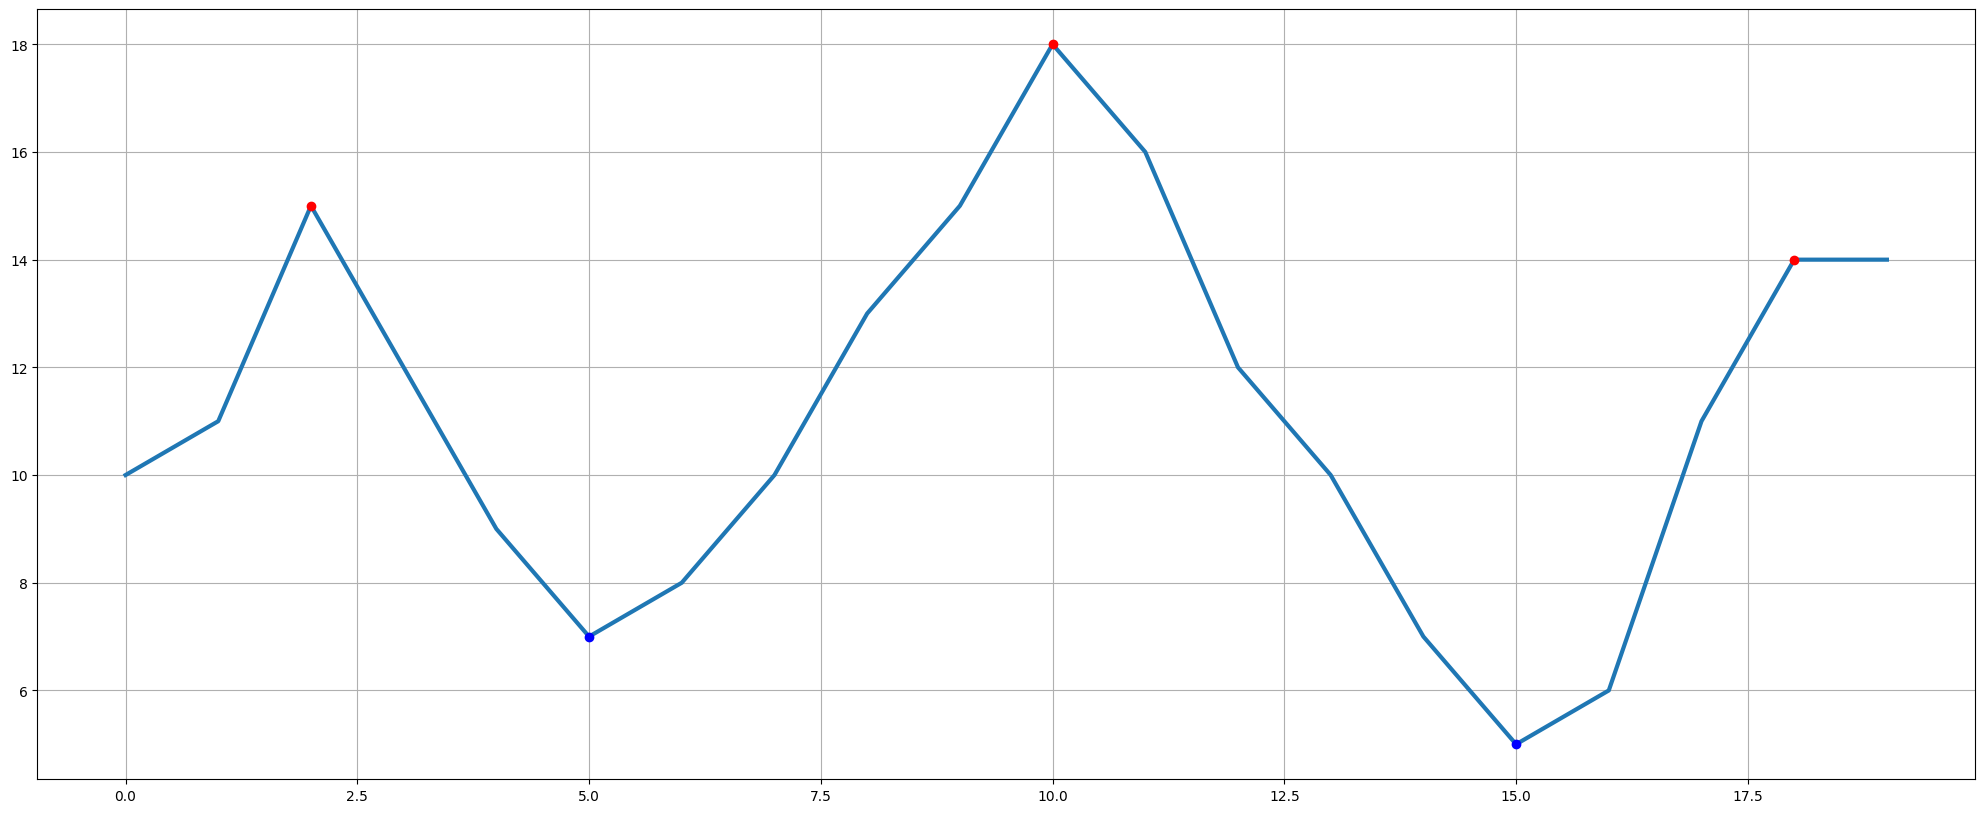

In [1764]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [1765]:
date_time_str,days,interval

('16/04/24 07:00:00', 15, 12)

## last records

In [1766]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
2966,19.75,21.326667
2967,19.63,21.111250
2968,19.22,20.918750
2969,18.64,20.731667
2970,18.04,20.531667
...,...,...
3129,30.00,22.927917
3130,29.35,23.147917
3131,29.00,23.327500
3132,22.93,23.506250


<Axes: >

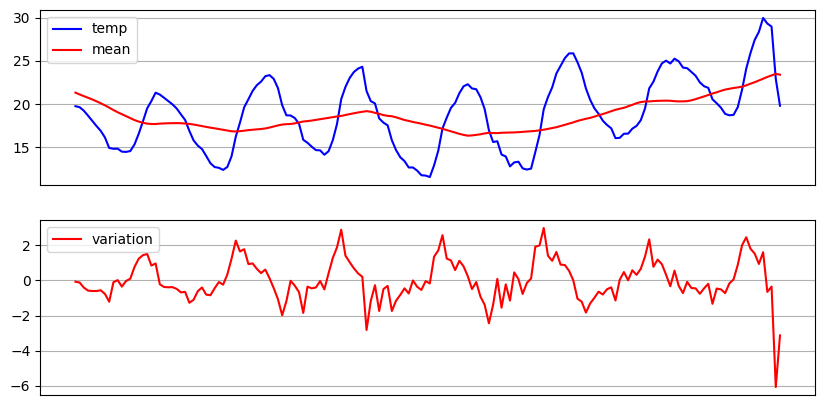

In [1767]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [1768]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(30.0, 11.52000000000004)

In [1769]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [1770]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 27.38 18.37 9.01
J -28 21.17 16.43 4.74
J -27 24.91 11.37 13.54
J -26 30.77 15.46 15.31
J -25 35.79 19.76 16.03
J -24 33.8 21.12 12.68
J -23 30.69 19.74 10.95
J -22 28.11 19.44 8.67
J -21 26.48 15.53 10.95
J -20 25.12 17.07 8.05
J -19 29.27 14.6 14.67
J -18 29.64 16.33 13.31
J -17 27.36 15.73 11.63
J -16 27.77 17.11 10.66
J -15 26.55 17.67 8.88
J -14 29.59 16.17 13.42
J -13 31.76 17.71 14.05
J -12 36.56 21.3 15.26
J -11 34.29 20.41 13.88
J -10 26.87 19.36 7.51
J -9 27.44 18.54 8.9
J -8 26.04 16.71 9.33
J -7 24.92 19.51 5.41
J -6 21.32 14.44 6.88
J -5 23.36 12.35 11.01
J -4 24.33 14.11 10.22
J -3 22.3 11.52 10.78
J -2 25.89 12.39 13.5
J -1 25.27 16.04 9.23
J 0 30.0 18.69 11.31


<Axes: >

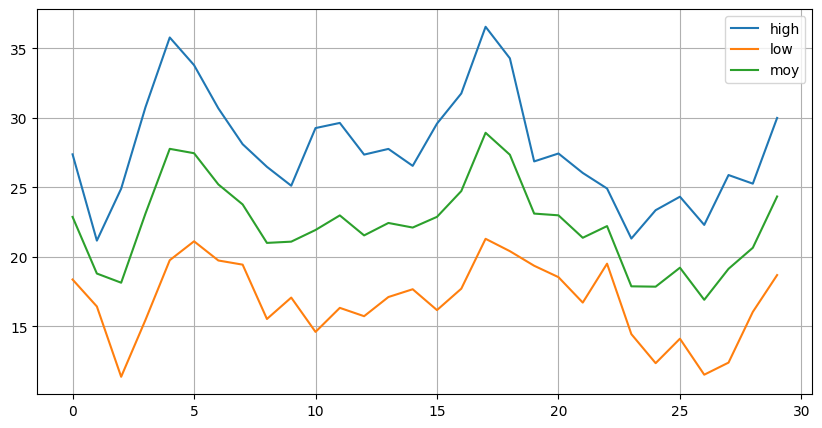

In [1771]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [1772]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[27.38, 35.79, 29.64, 27.77, 36.56, 27.44, 24.33, 25.89]

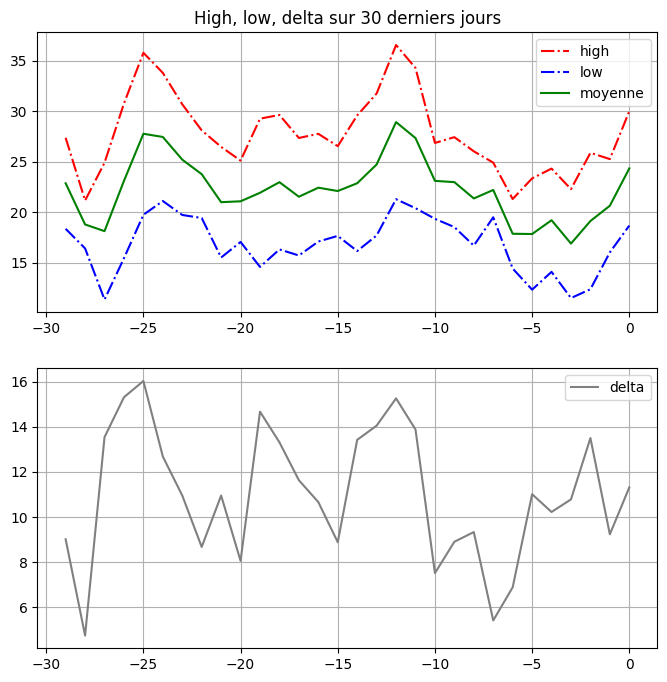

In [1773]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [1774]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       3134 non-null   float64
 1   hours      3134 non-null   float64
 2   dates      3134 non-null   object 
 3   variation  3133 non-null   float64
 4   heures     3134 non-null   object 
 5   jours      3134 non-null   object 
dtypes: float64(3), object(3)
memory usage: 147.0+ KB


In [1775]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [1776]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [1777]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

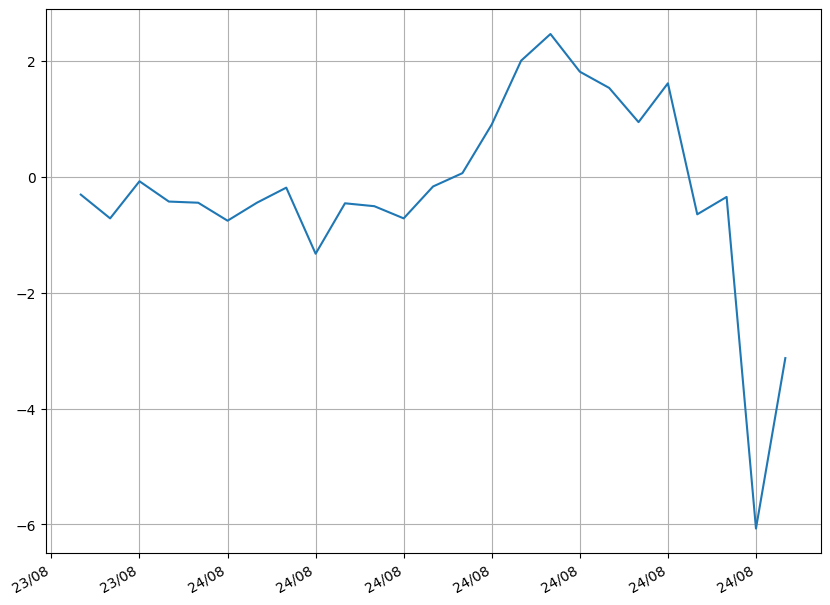

In [1778]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [1779]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, 36.56, 11.52000000000004)

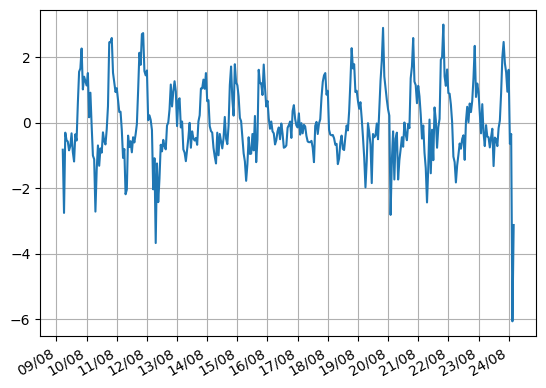

In [1780]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [1781]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(36.56,
 2844    12/08/24 19:00:00
 Name: dates, dtype: object)

In [1782]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(11.52000000000004,
 131     21/04/24 18:00:00
 3050    21/08/24 09:00:00
 Name: dates, dtype: object)

In [1783]:
data.tail(w)['temp'].describe()

count    360.00000
mean      21.42650
std        4.83899
min       11.52000
25%       18.40000
50%       21.21500
75%       24.34250
max       36.56000
Name: temp, dtype: float64

In [1784]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('24/08/24 19:30:45', 19.8)

In [1785]:
# current date and time
ts = datetime.timestamp(today)
ts

1724520645.697359